<a href="https://colab.research.google.com/github/amaanrzv39/Machine-Learning/blob/master/Exist_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#import contractions

In [2]:
exist_train = pd.read_csv("/content/drive/MyDrive/Data Sets/Exist 2022/EXIST2021_training.tsv", sep = '\t')
exist_test = pd.read_csv("/content/drive/MyDrive/Data Sets/Exist 2022/EXIST2021_test.tsv", sep = '\t')

In [3]:
train_en = exist_train[exist_train['language']=='en']
test_en = exist_test[exist_test['language']=='en']
train_es = exist_train[exist_train['language']=='es']
test_es = exist_test[exist_test['language']=='es']

In [4]:
print('Train-en : ',exist_train[exist_train['language']=='en'].shape)
print('Train-es : ',exist_train[exist_train['language']=='es'].shape)
print('Test-en : ',exist_test[exist_test['language']=='en'].shape)
print('Test-es : ',exist_test[exist_test['language']=='es'].shape)

Train-en :  (3436, 7)
Train-es :  (3541, 7)
Test-en :  (2208, 7)
Test-es :  (2160, 7)


In [ ]:
x = train_en[train_en['text'].apply(len)<50]
#train_en['text'].apply(len)

,test_case,id,source,language,text,task1,task2
3228,EXIST2021,3229,twitter,en,This bint hahaha https://t.co/erWAc1PoLi,sexist,misogyny-non-sexual-violence


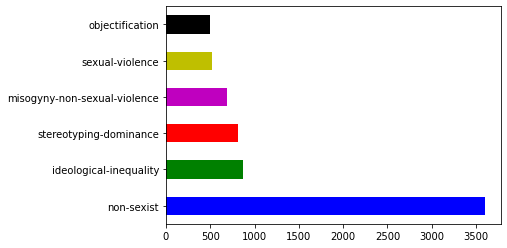

In [13]:
exist_train['task2'].value_counts().plot(kind='barh', color = ['b', 'g', 'r', 'm', 'y', 'k'])
plt.show()

In [6]:
exist_train['task2'].value_counts()

non-sexist                      3600
ideological-inequality           866
stereotyping-dominance           809
misogyny-non-sexual-violence     685
sexual-violence                  517
objectification                  500
Name: task2, dtype: int64

In [ ]:
train_es['task2'].count()

3541

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

def remove_extra_space(text):
    text = " ".join(text.split())
    return text

def remove_emoticons(text):
    text = re.sub(r'[^0-9|a-zA-Z|@|!|?|&|$|#|,|.|_|\']',' ',text)
    return text

def remove_weblinks(text):
    text = re.sub(r'http\S+', ' ', text, flags = re.MULTILINE)
    return text

def remove_specialchar(text):
    text = re.sub(r'[,|.|?|$|&|!|#|@]', ' ', text)
    return text

def remove_apostrophe(text):
    text = re.sub("'"," ",text)
    return text

def remove_number(text):
    text = re.sub(r"\b[0-9]+\b"," ",text)
    return text

def fix_contractions(text):
    text = contractions.fix(text)
    return text

def remove_repetitions(text):
    text = re.sub(r'\b([a-zA-Z])\1{1,}\b', ' ', text)
    text = re.sub(r'\b(_)\1{1,}\b', ' ', text)
    return text

def remove_singlealphabet(text):
    text = re.sub(r'\b([a-zA-Z])\b', ' ', text)
    return text    

In [ ]:
def preprocess(text):
  text = remove_weblinks(text)
  text = remove_specialchar(text)
  text = fix_contractions(text)
  #text = remove_emoji(text)
  text = remove_apostrophe(text)
  text = remove_number(text)
  text = remove_emoticons(text)
  text = remove_singlealphabet(text)
  text = remove_repetitions(text)
  text = remove_extra_space(text)
  return text

In [ ]:
train_en['clean text'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_en['clean text'] = train_en['text'].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
i = 890
print(train_en['clean text'][i])
print(train_en['task1'][i])
print(train_en['task2'][i])
print('Original : ',train_en['text'][i])

SaintRap The fact filtered in the snapped pictureMy man Jack ripped over Google like Jack the RipperYoohoo am fixing to murder this brunette bitchGet pumped like flat fixed to become flat fixtureA rap figure to look like you hacked TwitterI show you Beastie Boy
sexist
sexual-violence
Original :  @SaintRap The fact's filtered in the snapped pictureMy man Jack ripped over Google like Jack the RipperYoohoo, I'm finna murder this brunette bitchGet pumped like a flat fixed to become a flat fixtureA rap figure to look like you hacked TwitterI'll show you Beastie Boy


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#nltk.download('stopwords')
#nltk.download('punkt')
nltk.tokenize.word_tokenize("Aure_LieGuiboud")

['Aure_LieGuiboud']

In [ ]:
stemmer = SnowballStemmer('english', ignore_stopwords = True)

In [ ]:
test_en['clean text'] = test_en['text'].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), lowercase = True)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_en['clean text'])
X_test_tfidf = tfidf_vectorizer.transform(test_en['clean text'])
tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
importance = np.argsort(np.asarray(X_train_tfidf.sum(axis=0)).ravel())[::-1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(tfidf_feature_names[1000])
X_train_tfidf.shape

actual good


(3436, 72620)

In [ ]:
tfidf_feature_names[80:100]

array(['1newsnz', '1newsnz agree', '1pckt', '1pckt ____9753', '1s',
       '1s like', '1st', '1st amendment', '1st book', '1st church',
       '1st customer', '1st ladies', '1st lady', '1st mawm',
       '1st minister', '1st thought', '1starshot', '1starshot kimruxton',
       '1stderek', '1stderek senseisfuneral'], dtype='<U58')

In [ ]:
clf = LogisticRegression(penalty='none')
clf.fit(X_train_tfidf,train_en['task1'])
pred = clf.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_en['task1'],pred))
print("Accuracy : ",np.mean(pred == test_en['task1']))
print('Confusion Matrix:',confusion_matrix(test_en['task1'], pred))

clf2 = LogisticRegression(C=100, penalty='none')
clf2.fit(X_train_tfidf,train_en['task2'])
pred = clf2.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_en['task2'],pred))
print("Accuracy : ",np.mean(pred == test_en['task2']))
print('Confusion Matrix:',confusion_matrix(test_en['task2'], pred))

              precision    recall  f1-score   support

  non-sexist       0.72      0.68      0.70      1050
      sexist       0.72      0.76      0.74      1158

    accuracy                           0.72      2208
   macro avg       0.72      0.72      0.72      2208
weighted avg       0.72      0.72      0.72      2208

Accuracy :  0.7196557971014492
Confusion Matrix: [[714 336]
 [283 875]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


                              precision    recall  f1-score   support

      ideological-inequality       0.51      0.50      0.51       333
misogyny-non-sexual-violence       0.43      0.29      0.35       215
                  non-sexist       0.68      0.75      0.71      1050
             objectification       0.40      0.35      0.37       150
             sexual-violence       0.47      0.47      0.47       198
      stereotyping-dominance       0.43      0.40      0.42       262

                    accuracy                           0.58      2208
                   macro avg       0.49      0.46      0.47      2208
                weighted avg       0.56      0.58      0.57      2208

Accuracy :  0.5756340579710145
Confusion Matrix: [[166  14 119   2   7  25]
 [ 22  63  72  18  18  22]
 [ 70  35 792  38  56  59]
 [  7  11  38  52  18  24]
 [ 10  13  60  15  93   7]
 [ 49  11  88   5   4 105]]


In [ ]:
clf = MultinomialNB(alpha = 2)
clf.fit(X_train_tfidf,train_en['task1'])
pred = clf.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_en['task1'],pred))
print("Accuracy : ",np.mean(pred == test_en['task1']))
print('Confusion Matrix:',confusion_matrix(test_en['task1'], pred))

clf2 = MultinomialNB()
clf2.fit(X_train_tfidf,train_en['task2'])
pred = clf2.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_en['task2'],pred))
print("Accuracy : ",np.mean(pred == test_en['task2']))
print('Confusion Matrix:',confusion_matrix(test_en['task2'], pred))

              precision    recall  f1-score   support

  non-sexist       0.63      0.79      0.70      1050
      sexist       0.75      0.57      0.65      1158

    accuracy                           0.68      2208
   macro avg       0.69      0.68      0.67      2208
weighted avg       0.69      0.68      0.67      2208

Accuracy :  0.6757246376811594
Confusion Matrix: [[832 218]
 [498 660]]
                              precision    recall  f1-score   support

      ideological-inequality       0.00      0.00      0.00       333
misogyny-non-sexual-violence       0.00      0.00      0.00       215
                  non-sexist       0.48      1.00      0.65      1050
             objectification       1.00      0.01      0.03       150
             sexual-violence       1.00      0.01      0.01       198
      stereotyping-dominance       0.78      0.03      0.05       262

                    accuracy                           0.48      2208
                   macro avg       0.54

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = SVC(C=10, kernel='rbf',gamma=0.1)
clf.fit(X_train_tfidf,train_en['task1'])
pred = clf.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_en['task1'],pred))
print("Accuracy : ",np.mean(pred == test_en['task1']))
print('Confusion Matrix:',confusion_matrix(test_en['task1'], pred))

clf2 = SVC(C=10, kernel='rbf',gamma=0.1)
clf2.fit(X_train_tfidf,train_en['task2'])
pred = clf2.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_en['task2'],pred))
print("Accuracy : ",np.mean(pred == test_en['task2']))
print('Confusion Matrix:',confusion_matrix(test_en['task2'], pred))

              precision    recall  f1-score   support

  non-sexist       0.71      0.65      0.68      1050
      sexist       0.70      0.75      0.73      1158

    accuracy                           0.71      2208
   macro avg       0.71      0.70      0.70      2208
weighted avg       0.71      0.71      0.70      2208

Accuracy :  0.7051630434782609
Confusion Matrix: [[683 367]
 [284 874]]
                              precision    recall  f1-score   support

      ideological-inequality       0.63      0.42      0.51       333
misogyny-non-sexual-violence       0.51      0.25      0.33       215
                  non-sexist       0.60      0.86      0.71      1050
             objectification       0.45      0.25      0.32       150
             sexual-violence       0.53      0.39      0.45       198
      stereotyping-dominance       0.52      0.31      0.39       262

                    accuracy                           0.59      2208
                   macro avg       0.54

In [ ]:
train_es['clean text'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_es['clean text'] = train_es['text'].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_es['clean text'] = test_es['text'].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_es['clean text']

3436    Nadie te va tratar tan bien como un hombre que...
3437    lindagisela74 Que rica putita obediente afortu...
3438    BicireporteraDF Yo lo hice los os por la carre...
3439    las cosas sue son indicios de que yo enrealida...
3440    Pero la ni le gust desde que lo vi as que me l...
                              ...                        
6972    Estamos igual sin pareja pero puedes besar tus...
6973                                 hijo de re mil putas
6974    SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975              safetyaitana mi madre dice va fea agree
6976    En vuestras casas tambi ten is esa tradici de ...
Name: clean text, Length: 3541, dtype: object

In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), lowercase = True)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_es['clean text'])
X_test_tfidf = tfidf_vectorizer.transform(test_es['clean text'])
tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
importance = np.argsort(np.asarray(X_train_tfidf.sum(axis=0)).ravel())[::-1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf = LogisticRegression(penalty='none')
clf.fit(X_train_tfidf,train_es['task1'])
pred = clf.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_es['task1'],pred))
print("Accuracy : ",np.mean(pred == test_es['task1']))
print('Confusion Matrix:',confusion_matrix(test_es['task1'], pred))

clf2 = LogisticRegression(C=100, penalty='none')
clf2.fit(X_train_tfidf,train_es['task2'])
pred = clf2.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_es['task2'],pred))
print("Accuracy : ",np.mean(pred == test_es['task2']))
print('Confusion Matrix:',confusion_matrix(test_es['task2'], pred))

              precision    recall  f1-score   support

  non-sexist       0.69      0.78      0.73      1037
      sexist       0.77      0.68      0.72      1123

    accuracy                           0.73      2160
   macro avg       0.73      0.73      0.73      2160
weighted avg       0.73      0.73      0.73      2160

Accuracy :  0.7287037037037037
Confusion Matrix: [[805 232]
 [354 769]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


                              precision    recall  f1-score   support

      ideological-inequality       0.67      0.60      0.63       288
misogyny-non-sexual-violence       0.63      0.31      0.41       257
                  non-sexist       0.64      0.87      0.74      1037
             objectification       0.59      0.24      0.34       174
             sexual-violence       0.69      0.27      0.39       202
      stereotyping-dominance       0.43      0.48      0.45       202

                    accuracy                           0.62      2160
                   macro avg       0.61      0.46      0.49      2160
                weighted avg       0.62      0.62      0.59      2160

Accuracy :  0.6208333333333333
Confusion Matrix: [[173   4  92   1   0  18]
 [ 22  79 120   5   9  22]
 [ 35  23 898  11  11  59]
 [  6  10  98  41   4  15]
 [  5   1 120   8  54  14]
 [ 18   9  76   3   0  96]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf = MultinomialNB(alpha = 2)
clf.fit(X_train_tfidf,train_es['task1'])
pred = clf.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_es['task1'],pred))
print("Accuracy : ",np.mean(pred == test_es['task1']))
print('Confusion Matrix:',confusion_matrix(test_es['task1'], pred))

clf2 = MultinomialNB()
clf2.fit(X_train_tfidf,train_es['task2'])
pred = clf2.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_es['task2'],pred))
print("Accuracy : ",np.mean(pred == test_es['task2']))
print('Confusion Matrix:',confusion_matrix(test_es['task2'], pred))

              precision    recall  f1-score   support

  non-sexist       0.66      0.81      0.73      1037
      sexist       0.78      0.62      0.69      1123

    accuracy                           0.71      2160
   macro avg       0.72      0.71      0.71      2160
weighted avg       0.72      0.71      0.71      2160

Accuracy :  0.7092592592592593
Confusion Matrix: [[835 202]
 [426 697]]
                              precision    recall  f1-score   support

      ideological-inequality       1.00      0.01      0.01       288
misogyny-non-sexual-violence       0.00      0.00      0.00       257
                  non-sexist       0.48      1.00      0.65      1037
             objectification       0.71      0.03      0.06       174
             sexual-violence       0.00      0.00      0.00       202
      stereotyping-dominance       1.00      0.03      0.07       202

                    accuracy                           0.49      2160
                   macro avg       0.53

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = SVC(C=10, kernel='rbf',gamma=0.1)
clf.fit(X_train_tfidf,train_es['task1'])
pred = clf.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_es['task1'],pred))
print("Accuracy : ",np.mean(pred == test_es['task1']))
print('Confusion Matrix:',confusion_matrix(test_es['task1'], pred))

clf2 = SVC(C=10, kernel='rbf',gamma=0.1)
clf2.fit(X_train_tfidf,train_es['task2'])
pred = clf2.predict(X_test_tfidf)
#print(clf.best_params_)
#print(clf.best_score_)
print(classification_report(test_es['task2'],pred))
print("Accuracy : ",np.mean(pred == test_es['task2']))
print('Confusion Matrix:',confusion_matrix(test_es['task2'], pred))

              precision    recall  f1-score   support

  non-sexist       0.69      0.78      0.73      1037
      sexist       0.77      0.67      0.72      1123

    accuracy                           0.72      2160
   macro avg       0.73      0.72      0.72      2160
weighted avg       0.73      0.72      0.72      2160

Accuracy :  0.7226851851851852
Confusion Matrix: [[806 231]
 [368 755]]
                              precision    recall  f1-score   support

      ideological-inequality       0.69      0.53      0.60       288
misogyny-non-sexual-violence       0.63      0.28      0.39       257
                  non-sexist       0.59      0.91      0.72      1037
             objectification       0.66      0.22      0.33       174
             sexual-violence       0.83      0.17      0.28       202
      stereotyping-dominance       0.56      0.35      0.43       202

                    accuracy                           0.61      2160
                   macro avg       0.66